<a href="https://colab.research.google.com/github/Sakib3602/ML/blob/main/Gaussian_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# ***`Gaussian Naive Bayes on a Numeric Dataset`***

--> This use for continuos data

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target

print('Shape of X (features):', X.shape)
print('Shape of y (labels):', y.shape)
print('Target names:', data.target_names)
print('\nFirst 5 feature names:')
print(data.feature_names[:5])

Shape of X (features): (569, 30)
Shape of y (labels): (569,)
Target names: ['malignant' 'benign']

First 5 feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']


In [ ]:
# Put into a DataFrame for easier viewing
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


target
1    357
0    212
Name: count, dtype: int64


<Axes: xlabel='target'>

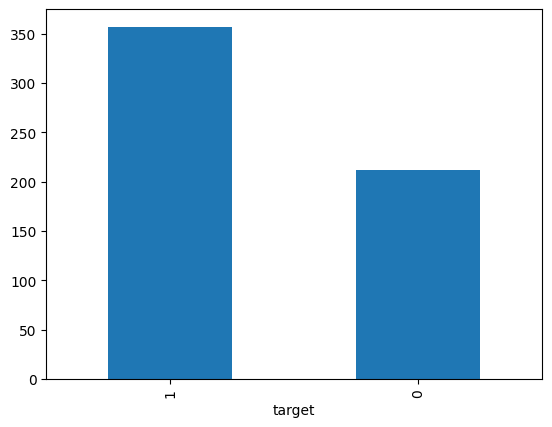

In [ ]:
class_counts = df['target'].value_counts()
print(class_counts)

plt.figure()
class_counts.plot(kind='bar')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42, stratify=y)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)

Shape of X_train: (455, 30)
Shape of X_test: (114, 30)


In [ ]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred_gnb = GNB.predict(X_test)
print(confusion_matrix(y_test,y_pred_gnb))
print("ACCURACY : ", accuracy_score(y_test,y_pred_gnb))

[[38  4]
 [ 3 69]]
ACCURACY :  0.9385964912280702


Confusion matrix:
 [[38  4]
 [ 3 69]]


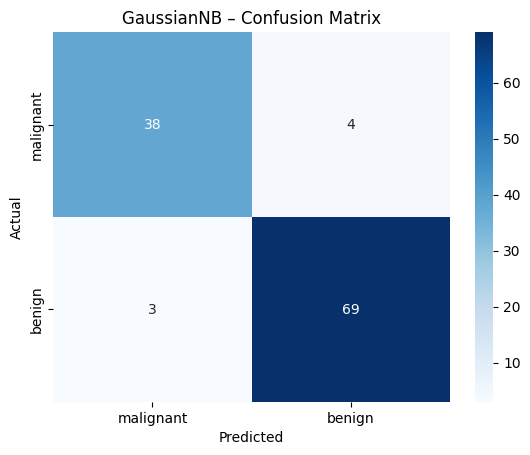

In [ ]:
cm = confusion_matrix(y_test, y_pred_gnb)
print('Confusion matrix:\n', cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('GaussianNB – Confusion Matrix')
plt.show()

In [ ]:
print("Classification Report : \n--------------------- \n",classification_report(y_test,y_pred_gnb))

Classification Report : 
--------------------- 
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



precision for malignant tells us: out of all samples predicted as malignant, how many were actually malignant.

recall for malignant tells us: out of all truly malignant cases, how many we correctly caught.

In medical tasks, recall for malignant is very important (missing a cancer case is risky).
Naive Bayes uses mean and variance of each feature per class under the Gaussian assumption.



✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈✈

